In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (8.3) - (8.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

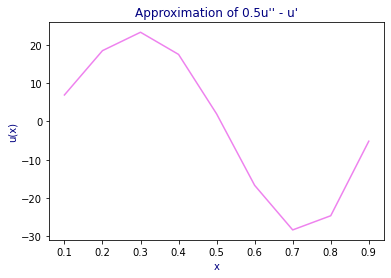

In [4]:
#define u as lambda function:
u = lambda x: np.sin((x+np.pi)**2 - 1)

#define parameters will need:
a, b, n = 0, 1, 10

h = (b-a)/n

#want u', u'':
#equations 8.3, 8.4 give us u'
#we will use equation 8.4:
#get u':
M1 = np.diag(np.ones(n-2), 1)          #put in ones on diagonal above the actual diagonal
M2 = np.diag(-1*np.ones(n-2), -1)      #put in neg ones in diagonal below the actual diagonal
M = M1+M2                              #final matrix M in equation 8.4

x_vals = np.linspace(a, b, n+1)        #need x values to plug into u

#get 2nd term in equation 8.4:
u_thingy = np.zeros(n-1)
u_thingy[0] = -u(x_vals[0])/(2*h)
u_thingy[-1] = u(x_vals[-1])/(2*h)

#in u vector: start x's with x1 = why have x_vals[1:] here and dont want last x term in u vector why have -1 after :
u_prime = (1/(2*h))*M@u(x_vals[1:-1]) + u_thingy        #equation 8.4

#get u'': use equation 8.6
MM = np.diag(-2*np.ones(n-1)) + np.diag(np.ones(n-2), 1) + np.diag(np.ones(n-2), -1)  

#get added on u vector:
u_thingy2 = np.zeros(n-1)
u_thingy2[0] = u(x_vals[0])/(h**2)
u_thingy2[-1] = u(x_vals[-1])/(h**2)

#now get entire equation 8.6:
u_dprime = (1/h**2)*MM@u(x_vals[1:-1]) + u_thingy2

#now get the approximation:
approx = 0.5*u_dprime - u_prime

#graph results now:
plt.plot(x_vals[1:-1], approx, color = "violet")
plt.xlabel("x", color = "navy")
plt.ylabel("u(x)", color = "navy")
plt.title("Approximation of 0.5u'' - u'", color = "navy")
plt.show()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

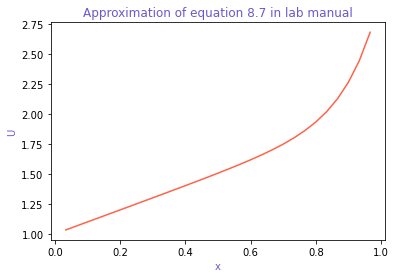

In [5]:
#first make f function:
f = lambda x: -1

alph, beta, n, eps, a, b = 1, 3, 30, 1/10, 0, 1

x = np.linspace(a, b, n+1)  #get domain of x values have: told on [0,1]

h = (b-a)/n

#make matrix have in equation 8.9:
M = np.diag((-2*eps)*np.ones(n-1)) + np.diag((eps-h/2)*np.ones(n-2), 1) + np.diag((eps+h/2)*np.ones(n-2), -1)

#get g vector that equation 8.9 is equal to:
g = -1*np.ones(n-1)  #every value of f is -1, need change first, last value like in last problem
g[0] = g[0] - alph*(eps+h/2)/(h**2)
g[-1] = g[-1] - beta*(eps-h/2)/(h**2)

#now solve for U: use np.linalg.solve
U = np.linalg.solve((1/h**2)*M, g)

#graph the solution:
plt.plot(x[1:-1], U, color = "tomato")
plt.xlabel("x", color = "slateblue")
plt.ylabel("U", color = "slateblue")
plt.title("Approximation of equation 8.7 in lab manual", color = "slateblue")
plt.show()

# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (8.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [6]:
def singular_bvp(eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (8.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n-1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    #doing same thing as prob 2 but in general case: dont specify parameters have in this function
    a, b = 0, 1
    
    x = np.linspace(a, b, n+1) #get domain for x values
    h = (b-a)/n
    
    #make matrix have in equation 8.9:
    M = np.diag((-2*eps)*np.ones(n-1)) + np.diag((eps-h/2)*np.ones(n-2), 1) + np.diag((eps+h/2)*np.ones(n-2), -1)
    
    #get g vector that equation 8.9 is equal to:
    g = -1*np.ones(n-1)  #every value of f is -1, need change first, last value like in last problem
    g[0] = g[0] - alph*(eps+h/2)/(h**2)
    g[-1] = g[-1] - beta*(eps-h/2)/(h**2)

    #now solve for U: use np.linalg.solve
    U = np.linalg.solve((1/h**2)*M, g)
    
    #add the initial, last element onto U:
    return np.concatenate((np.array([alpha]), U, np.array([beta])))

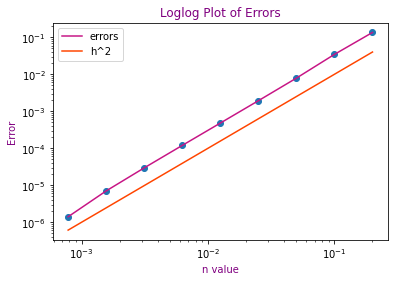

In [8]:
n_vals = [5 * 2**i for i in range(10)]  #get the n values
a, b, eps, alpha, beta = 0, 1, .1, 1, 3

sol_best = singular_bvp(eps,alpha,beta,f,n_vals[-1])  #get the best solution
errors = []  #want plot errors so store them in list

for j in range(9):
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))
    errors.append(error)
    
#want plot to look like fig 8.2:
plt.loglog([1/n for n in n_vals][:-1], errors, color = "mediumvioletred",label = "errors")  #want make loglog plot of errors
plt.loglog([(1/n) for n in n_vals][:-1], [(1/n)**2 for n in n_vals][:-1],label = 'h^2', color = "orangered")  #want plot h^2 like in figure 8.2
plt.xscale('log')
plt.yscale('log')
plt.scatter([(1/n) for n in n_vals][:-1], errors)
plt.title("Loglog Plot of Errors", color = "purple")
plt.xlabel("n value", color = "purple")
plt.ylabel("Error", color = "purple")
plt.legend(loc = "best")
plt.show()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

In [17]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    #do everything we have done so far in lab but in general now: so need make general matrix, need to make
    #general of the initial conditions and the vector equation 8.9 is equal to/
    
    h = (b-a)/n
    
    x = np.linspace(a, b, n+1)
    
    #the a's can be functions:
    a1x = a1(x)
    a2x = a2(x)
    a3x = a3(x)
    
    #make generalized matrix of the matrix in equation 8.9:
    M1 = np.diag((-2*a1x + (h**2)*a3x)[1:n])
    M2 = np.diag((a1x - ((h*a2x)/2))[2:n], -1)
    M3 = np.diag((a1x + ((h*a2x)/2))[1:n-1], 1)
    M = M1 + M2 + M3
    
    #get g vector that equation 8.9 was equal to: 
    g = f(x)[1:-1]  #define g w/out first, last elements bc will specify what they are next  
    g[0] = g[0] - alpha*(a1x[1] - .5*h*a2x[1])/h**2
    g[-1] = g[-1] - beta*(a1x[n-1] - .5*h*a2x[n-1])/h**2
    
    #now solve for U: use np.linalg.solve
    U = np.linalg.solve((1/h**2)*M, g)

    #add the initial, last element onto U, return U:
    return np.concatenate((np.array([alpha]), U, np.array([beta])))

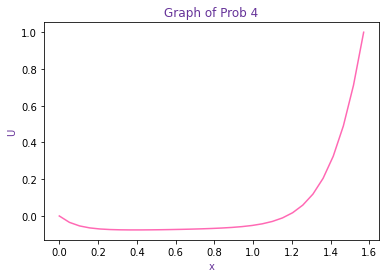

In [18]:
#now test w/ example they gave us:
a, b = 0, np.pi/2
alpha, beta = 0, 1
n = 30
a1 = lambda x: .1*np.ones(len(x))
a2 = lambda x: np.zeros(len(x))
a3 = lambda x: -4*(np.pi - x**2)
f = lambda x: np.cos(x)

U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)  #our solution!

x = np.linspace(a, b, n+1)  #x domain to plot over

#plot solution:
plt.plot(x, U, color = "hotpink")
plt.xlabel("x", color = "rebeccapurple")
plt.ylabel("U", color = "rebeccapurple")
plt.title("Graph of Prob 4", color = "rebeccapurple")
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

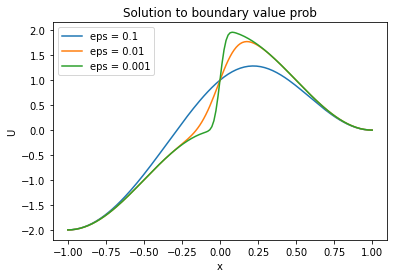

In [314]:
#now test w/ example they gave us:
a, b = -1, 1
alpha, beta = -2, 0
n = 150
eps_vals = [0.1, 0.01, 0.001]

for eps in eps_vals:
    a1 = lambda x: eps*np.ones(len(x))
    a2 = lambda x: x
    a3 = lambda x: np.zeros(len(x))
    f = lambda x: -eps*(np.pi**2)*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)

    U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)  #our solution!
    
    #plot solution:
    dom = np.linspace(a, b, len(U))
    plt.plot(dom, U, label = "eps = " + str(eps))
    
plt.title("Solution to boundary value prob")
plt.xlabel("x")
plt.ylabel("U")
plt.legend(loc = "best")
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

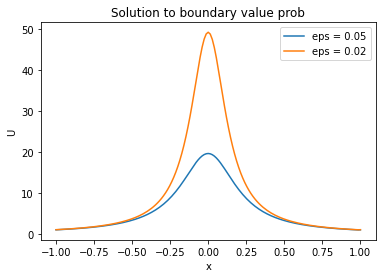

In [315]:
#now test w/ example they gave us:
a, b = -1, 1
n = 150
eps_vals = [0.05, 0.02]

for eps in eps_vals:
    alpha, beta = 1/(1+eps), 1/(1+eps)
    
    a1 = lambda x: eps+(x**2)
    a2 = lambda x: 4*x
    a3 = lambda x: 2*np.ones(len(x))
    f = lambda x: np.zeros(len(x))
    
    U = bvp(a,b,alpha,beta,a1,a2,a3,f,n)  #our solution!
    
    #plot solution:
    dom = np.linspace(a, b, len(U))
    plt.plot(dom, U, label = "eps = " + str(eps))
    
plt.title("Solution to boundary value prob")
plt.xlabel("x")
plt.ylabel("U")
plt.legend(loc = "best")
plt.show()